# 📌 Explicación del Notebook – Descarga de Imágenes Astronómicas con Coordenadas Celestes



Este notebook tiene como objetivo descargar imágenes astronómicas a partir de coordenadas celestes. Aunque es posible usar distintos sistemas de referencia (como B1950 o J2000), en este ejemplo empleamos J2000, ya que es el más utilizado actualmente en astronomía.

Las imágenes se obtienen a través del servicio en línea del Sloan Digital Sky Survey (SDSS), permitiendo analizar galaxias y otros objetos astronómicos con sus coordenadas de Ascensión Recta (AR) y Declinación (DEC).

## 1. 🔧 INSTALACIÓN DE LIBRERÍAS

In [ ]:
# 📌 Instalación de librerías necesarias
! pip install numpy pandas matplotlib seaborn h5py requests tqdm PIL pillow
! pip install --update pillow

# 📌 Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import h5py
import requests
from tqdm import tqdm
from PIL import Image

# 📌 Confirmación de carga exitosa
print("\n✅ Todas las librerías se han importado correctamente.")



✅ Todas las librerías se han importado correctamente.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for PIL


📌 Explicación:

- Se instalan las librerías necesarias (numpy, pandas, matplotlib, seaborn, h5py).
- Se importan para su uso en el procesamiento de datos, visualización y manejo de archivos.
- os: se usa para crear y manejar directorios.
- h5py: se emplea en caso de necesitar almacenamiento en formato HDF5.
- requests: Para hacer peticiones HTTP y descargar imágenes.
- tqdm: Para mostrar barras de progreso en iteraciones.
- PIL: Es un paquete correcto para manejar imágenes en Python.

## 2. LECTURA DE ARCHIVOS DE COORDENADAS 📍

In [35]:
columnas = [
    "ID", "cig", "PGCNumber", "T", "AC", 
    "OuterVariety", "Family", "InnerVariety", "Stage", "Spindle", 
    "Peculiar", "Other"
]

ButaTableB = pd.read_csv('001.DATOS/Buta_TABLEb.csv', names=columnas)


# Leer el archivo CSV especificando los nombres de las columnas
Coordenadas = pd.read_csv('001.DATOS/COORDINATES.csv')

# Realizar la combinación para obtener solo las filas coincidentes en la columna CIG
merged_data = pd.merge(Coordenadas, ButaTableB, on='cig')

# Mostrar las primeras filas del DataFrame combinado
merged_data

,cig,ASC_H_B1950,ASC_M_B1950,ASC_S_B1950,ASC_D_B1950,DEC_G_B1950,DEC_M_B1950,DEC_S_B1950,DEC_D_B1950,ASC_H_J2000,...,PGCNumber,T,AC,OuterVariety,Family,InnerVariety,Stage,Spindle,Peculiar,Other
0,1,0,0,31.92,0.13300,-2,11,33.8,-2.1927,0,...,205,4.0,9,NaN,SA,(rs),bc,NaN,NaN,NaN
1,2,0,0,46.30,0.19291,29,31,8.0,29.5188,0,...,223,6.0,5,NaN,SB,(rs),cd,NaN,NaN,NaN
2,4,0,1,24.75,0.35312,20,28,26.5,20.4740,0,...,279,5.0,3,NaN,SA,(rs),c,sp,NaN,NaN
3,5,0,5,19.86,1.33275,20,8,2.8,20.1341,0,...,602,3.0,99,NaN,SA,(r_s),b:,NaN,NaN,NaN
4,6,0,6,20.00,1.58333,23,32,21.1,23.5391,0,...,652,9.0,4,NaN,SA_B,(s),m,NaN,pec,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1046,23,53,6.29,358.27620,19,14,14.8,19.2374,23,...,72888,5.0,12:,NaN,SB,(rs),c,NaN,NaN,NaN
718,1047,23,54,13.88,358.55783,1,4,36.0,1.0766,23,...,72983,6.0,2,NaN,S,NaN,cd:,spw,pec,NaN
719,1048,23,54,50.94,358.71225,30,42,49.4,30.7137,23,...,73023,5.0,9,NaN,SB,(s),c,NaN,NaN,NaN
720,1050,23,55,58.79,358.99495,25,56,11.1,25.9364,23,...,73100,5.5,4,NaN,SAB,(s),_cd,NaN,NaN,NaN


---

📌 Explicación:

- Se usan dos archivos CSV: uno con coordenadas astronómicas y otro con datos morfológicos de ciertas galaxias.
- Se realiza una combinación de datos (merge) para obtener solo las galaxias presentes en ambos archivos.
- Esto permite filtrar y analizar un subconjunto específico de galaxias dentro del catálogo CIG.

⚠️ Nota: 

- Para el funcionamiento básico del programa, solo es necesario el archivo de coordenadas. La combinación con datos adicionales es opcional.

---

## 🌌 2. OBTENCIÓN DE IMÁGENES ASTRONÓMICAS 📷

---


 1. Escala y dimensiones para la clasificación de galaxias

- **Scale (`scale`)**: Este parámetro determina la escala de la imagen en arcosegundos por píxel. 
  
- **Ancho (`width`) y altura (`height`)**: Para obtener imágenes claras y detalladas, un tamaño de 1024x1024 píxeles es generalmente adecuado. 

```python
scale = 0.15  # arcosegundos por píxel
width = 1024  # píxeles
height = 1024  # píxeles
```

2. Resumen detallado del contenido de la página de documentación de API de SkyServer

La página de documentación de la API de SkyServer de SDSS proporciona una descripción completa de los servicios web y las API disponibles para interactuar con la base de datos del SDSS. Aquí tienes un resumen detallado:

**Introducción a los Servicios Web de SkyServer**
- **SkyServer** proporciona varias API RESTful para acceder a los datos astronómicos de SDSS.
- Estas API permiten obtener información sobre objetos celestes, imágenes, espectros y realizar consultas SQL directamente a la base de datos de SDSS.


 **Image Cutout Service**:
   - **Endpoint**: `/ImgCutout/getjpeg`
   - **Descripción**: Proporciona recortes de imágenes en formato JPEG de cualquier parte del cielo cubierto por SDSS.
   - **Parámetros**:
     - `ra`: Ascensión recta del centro de la imagen.
     - `dec`: Declinación del centro de la imagen.
     - `scale`: Escala de la imagen en arcosegundos por píxel.
     - `width`: Ancho de la imagen en píxeles.
     - `height`: Altura de la imagen en píxeles.
     - `opt`: Opciones de superposición (G para superponer la malla, sin valor para imagen limpia, etc.).
     - `QueryString`: Cadena de consulta para la superposición de objetos.


---

In [36]:
# Definimos los parámetros de imagen
scale = 0.15  # 🔍 Nivel de zoom
width = 1024  # 📏 Ancho de la imagen en píxeles
height = 1024  # 📏 Alto de la imagen en píxeles

def get_sdss_image_url(ra, dec):
    base_url = "http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg"
    params = {
        "ra": ra,
        "dec": dec,
        "scale": scale,
        "width": width,
        "height": height,
        "opt": "", 
        "TaskName": "Skyserver.Chart.Image",
    }
    url = f"{base_url}?ra={ra}&dec={dec}&scale={params['scale']}&width={params['width']}&height={params['height']}&opt={params['opt']}&TaskName={params['TaskName']}"
    return url



---
📌 Explicación:

- get_sdss_image_url(ra, dec) genera una URL con las coordenadas (Ascensión Recta y Declinación) en el servicio SDSS.

Los parámetros de la imagen incluyen:

- scale=0.15: Factor de escala (mayor número = menor zoom).
- width=1024, height=1024: Dimensiones de la imagen en píxeles.
- opt="": Opciones para sobreimprimir información en la imagen (vacío para una imagen limpia).

Si cambiamos la base de la URL en la función get_sdss_image_url(ra, dec), podemos obtener imágenes de otras bases de datos astronómicas.

1. Digitized Sky Survey (DSS)

URL base: https://archive.stsci.edu/cgi-bin/dss_search

2. Aladin Lite (CDS)

URL base: https://aladin.u-strasbg.fr/java/nph-aladin.pl

3. Pan-STARRS (PS1)

URL base: https://ps1images.stsci.edu/cgi-bin/ps1cutouts

---

In [37]:
# Función para descargar la imagen 
def download_image(url, filepath):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filepath, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
    else:
        print(f"Error downloading {filepath}: {response.status_code}")

---

📌 Explicación:

- Descarga la imagen desde la URL generada.
- Se guarda en el disco en la ubicación definida por filepath.
- Se usa descarga en streaming para manejar archivos grandes eficientemente.
- Si hay un error, se imprime el código de estado HTTP.

---

In [38]:
# Función para convertir una imagen en un array NumPy
def image_to_array(filepath):
    try:
        with Image.open(filepath) as img:
            # Convertir la imagen a un array de NumPy
            img_array = np.array(img)
            return img_array
    except Exception as e:
        print(f"Error converting {filepath} to array: {e}")
        return None

---

📌 Explicación:

- Convierte una imagen en un array NumPy, lo que permite su procesamiento en modelos de análisis de imágenes.
- Usa la librería PIL para abrir la imagen y transformarla en datos numéricos.
- Devuelve un array de píxeles, útil para machine learning o análisis computacional de imágenes.

⚠️ Nota:
- Si no se requiere para el propósito del proyecto (por ejemplo, si solo queremos descargar y visualizar imágenes sin análisis), esta parte del código junto con otras más adelante, puede eliminarse.

---

In [39]:
output_dir = f'001. IMAGENES DESCARGADAS/sdss_images_{scale}scale_{width}x{height}'
os.makedirs(output_dir, exist_ok=True)

print(f"📁 Directorio creado: {output_dir}")

📁 Directorio creado: 001. IMAGENES DESCARGADAS/sdss_images_0.15scale_1024x1024


--- 
📌 Explicación:

- Crea una carpeta para almacenar las imágenes descargadas.
- os.makedirs(output_dir, exist_ok=True): evita errores si la carpeta ya existe.
---

In [40]:
# Listas para almacenar arrays de imágenes y sus índices
arrays_imagenes = []
indices_imagenes = []

# Descargar las imágenes y convertirlas a arrays
for index, row in tqdm(merged_data.iterrows(), total=merged_data.shape[0]):
    ra = row['ASC_D_J2000']
    dec = row['DEC_D_J2000']
    filename = f"image_{index+1}.jpg"
    filepath = os.path.join(output_dir, filename)
    
    # Comprobar si la imagen ya existe
    if os.path.exists(filepath):
        print(f"File {filename} already exists. Skipping download.")
    else:
        url = get_sdss_image_url(ra, dec)
        download_image(url, filepath)
    
    # Convertir la imagen descargada a un array
    img_array = image_to_array(filepath)
    if img_array is not None:
        arrays_imagenes.append(img_array)
        indices_imagenes.append(index)

# Convertir la lista de arrays a un array NumPy de 4 dimensiones
datos_imagenes = np.array(arrays_imagenes)
indices_imagenes = np.array(indices_imagenes)

print(f'Datos de imágenes tienen forma: {datos_imagenes.shape}')
print(f'Índices de imágenes tienen forma: {indices_imagenes.shape}')

df_imagenes = pd.DataFrame({
    'Indice': indices_imagenes,
    'Imagen': list(datos_imagenes)  # Convirtiendo arrays a listas para almacenarlos en el DataFrame
})

100%|██████████| 722/722 [14:29<00:00,  1.20s/it]


Datos de imágenes tienen forma: (722, 1024, 1024, 3)
Índices de imágenes tienen forma: (722,)


---  

📌 **Explicación:**  

- Se itera sobre las coordenadas de la tabla y se descargan imágenes.  
- Se verifica si la imagen ya existe para evitar descargas innecesarias.  
- Se convierte cada imagen a un array NumPy y se almacena en una lista. *(Parte a eliminar si solo se desea obtener las imágenes)*  
- Finalmente, se crea un DataFrame de pandas con las imágenes y sus índices. *(Parte a eliminar si solo se desea obtener las imágenes)*  

⚠️ **Nota:**  
Si se cargan **muchas imágenes** en un DataFrame, el consumo de memoria puede ser **muy alto** y afectar el rendimiento del ordenador. Para evitar esto, si se desea trabajar con arrays, se recomienda:  
- **Reducir el tamaño de las imágenes** (por ejemplo, bajando la resolución en `width` y `height`).  
- **Cargar imágenes bajo demanda**, leyendo solo la imagen necesaria en el momento de su uso.  
- **Guardar y cargar imágenes en formato comprimido** (`.npy` o `.h5`) en lugar de mantenerlas en memoria.  
- **Utilizar generación de lotes** en frameworks como TensorFlow o PyTorch para procesar imágenes de manera eficiente.  

---

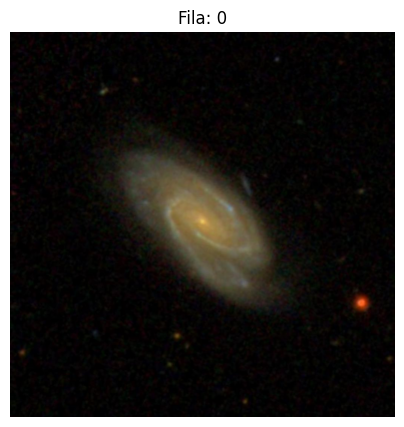

In [44]:
import matplotlib.pyplot as plt

def mostrar_imagen_por_fila(fila):
    try:
        # Obtener la imagen del DataFrame a partir del número de fila
        img_array = df_imagenes.iloc[fila]["Imagen"]
        
        # Mostrar la imagen usando Matplotlib
        plt.figure(figsize=(5, 5))
        plt.imshow(img_array)  # Mostrar en escala de grises
        plt.title(f'Fila: {fila}')  # Título con el número de fila
        plt.axis('off')  # Ocultar los ejes
        plt.show()
    except IndexError:
        print(f"La fila {fila} no existe en el DataFrame.")


mostrar_imagen_por_fila(0)


---
📌 Explicación:

- Muestra una imagen a partir de su índice en el DataFrame. (funcional solamente si se han convertido los datos a array, sinó, se podrá visualizar en la carpeta de imagenes)
- plt.axis('off') oculta los ejes para una visualización más limpia.

---